# Forelesning 8: Dynamiske systemer

__Repetisjonsoppgave:__ Sammenlikn kodesnuttene og diskuter hvilken metode som er brukt i hver funksjon:

In [1]:
def ukjent1(f, a, b, n):
    A = 0.0
    h = (b-a)/n
    for k in range (n-1):
        A = A + f(a + (k+1)*h)*h
    return A

def ukjent2(f, a, b, n):
    h = (b-a)/n
    A = (f(a) + f(b))/2.0
    for k in range(1, n):
        A = A + f(a + k*h)
    return A*h

def ukjent3(f, a, b, n):
    A = 0.0 
    h = (b-a)/n
    for k in range (n):
        A = A + f(a + k*h)*h
    return A

def ukjent4(f, a, b, n):
    A = 0.0
    h = (b-a)/n
    for k in range (n):
        A = A + f(a + (1+2*k)*(h/2))*h
    return A

## Fartslover (ratelover)
Vi bruker følgende reaksjon som eksempel (vi later først som om den er reversibel):

$$ H_2 (g) + I_2 (g) \rightarrow 2HI (g)$$

Vi har følgende ratelov for reaksjonen:

$$\frac{d[HI]}{dt} = k_r[H_2][I_2]$$

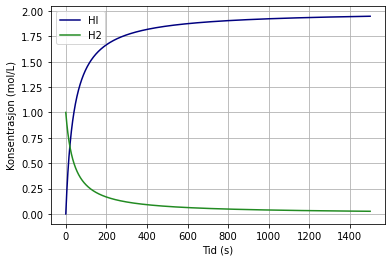

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Initialbetingelser
H20 = 1  # mol/L
I20 = 1  # mol/L
HI0 = 0  # mol/L
t0 = 0   # tid i s
tid_slutt = 1500
k = 5E-2 # reaksjonsratekonstant

dt = 1E-4
N = int((tid_slutt - t0)/dt) + 1 # Antall intervaller

# Arrayer
H2 = np.zeros(N)
I2 = np.zeros(N)
HI = np.zeros(N)
t = np.zeros(N)

H2[0] = H20
I2[0] = I20
HI[0] = HI0
t[0] = t0

# Integrasjonsløkke
for i in range(N-1):
    # Fartslovene
    HIder = k*I2[i]*H2[i]
    H2der = -0.5*HIder
    I2der = H2der
    # Eulers metode
    HI[i+1] = HI[i] + HIder*dt
    I2[i+1] = I2[i] + I2der*dt
    H2[i+1] = H2[i] + H2der*dt
    t[i+1] = t[i] + dt

plt.plot(t, HI, label = "HI", color = "navy")
plt.plot(t, H2, label = "H2", color = "forestgreen")
plt.xlabel("Tid (s)")
plt.ylabel("Konsentrasjon (mol/L)")
plt.legend()
plt.grid()
plt.show()

## Bruk av biblioteker

In [8]:
from scipy.integrate import solve_ivp
import numpy as np

In [16]:
def dydt(t, y):
    return y + t

a = 0
b = 10
N = 1000

t = np.linspace(a, b, N)
y0 = 0

y = solve_ivp(dydt, [a, b], [y0], t_eval = t)

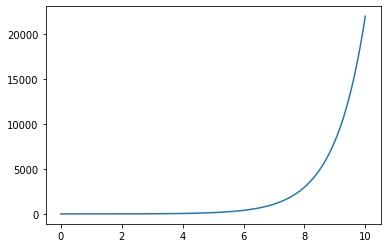

In [17]:
plt.plot(y.t, y.y[0])

[]

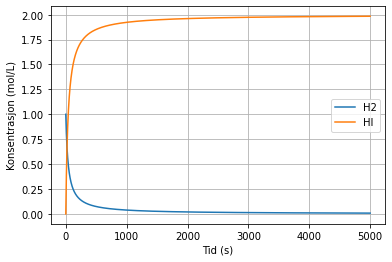

In [25]:
def fartslover(t, y):
    H2 = y[0]
    I2 = y[1]
    HI = y[2]
    k = 5E-2
    HIder = k*H2*I2
    H2der = -0.5*HIder
    I2der = H2der
    return [H2der, I2der, HIder]

a = 0
b = 5000
N = 10000

t = np.linspace(a, b, N)
y0 = [1, 1, 0]

y_int = solve_ivp(fartslover, [a, b], y0, t_eval = t, method = "BDF")
plt.plot(y_int.t, y_int.y[0], label = "H2")
plt.plot(y_int.t, y_int.y[2], label = "HI")
plt.legend()
plt.xlabel("Tid (s)")
plt.ylabel("Konsentrasjon (mol/L)")
plt.grid()
plt.plot()